In [11]:
from os.path import isfile,join
from os import listdir
import matplotlib.pyplot as plt, numpy as np
from read import read_np
import scipy.stats as stats
from scipy.interpolate import interp1d

LABEL_DIR = "../labels"
DATA_DIR = "../data"

data_files = [f for f in listdir(LABEL_DIR) if isfile(join(LABEL_DIR, f))]
print(data_files)

RAYON_ROUE = 0.69/2
PERIMETRE_ROUE = 2*3.14159*RAYON_ROUE
NAMES_INDEX = ["mesure1cm", "mesure2cm_bis", "mesure3cm", "mesure4cm"]
COLORS_INDEX = ["#44af69", "#f8333c", "#fcab10", "#2b9eb3"]

['1.txt', '2.txt', 'gcope_24.txt', 'gcope_27.txt', 'gcope_28.txt', 'mesure1cm.txt', 'mesure1cm_1.txt', 'mesure1cm_2.txt', 'mesure1cm_3.txt', 'mesure1cm_4.txt', 'mesure2cm.txt', 'mesure2cm_1.txt', 'mesure2cm_bis_0.txt', 'mesure2cm_bis_1.txt', 'mesure2cm_bis_2.txt', 'mesure2cm_bis_3.txt', 'mesure2cm_bis_4.txt', 'mesure2cm_bis_5.txt', 'mesure3cm_0.txt', 'mesure3cm_1.txt', 'mesure3cm_2.txt', 'mesure3cm_3.txt', 'mesure3cm_4.txt', 'mesure3cm_5.txt', 'mesure4cm_0.txt', 'mesure4cm_1.txt', 'mesure4cm_2.txt', 'mesure4cm_3.txt', 'mesure4cm_4.txt', 'mesure4cm_5.txt', 'mesure4cm_6.txt', 'mesure4cm_7.txt', 'mesure4cm_8.txt', 'mesure4cm_9.txt', 'mesure_loin_1.txt', 'mesure_loin_2.txt', 'mesure_loin_3.txt', 'mesure_loin_4.txt', 'mesure_med_1.txt', 'mesure_med_2.txt', 'mesure_med_3.txt', 'mesure_med_4.txt', 'mesure_med_5.txt', 'mesure_med_6.txt', 'mesure_proche_1.txt', 'mesure_proche_2.txt', 'mesure_proche_3.txt', 'zcope_11.txt', 'zcope_19.txt']


1.txt 0
2.txt 0
gcope_24.txt 0
gcope_27.txt 0
gcope_28.txt 0
mesure1cm.txt 1
mesure1cm_1.txt 1
mesure1cm_2.txt 1
mesure1cm_3.txt 1
mesure1cm_4.txt 1
mesure2cm.txt 0
mesure2cm_1.txt 0
mesure2cm_bis_0.txt 2
mesure2cm_bis_1.txt 2
mesure2cm_bis_2.txt 2
mesure2cm_bis_3.txt 2
mesure2cm_bis_4.txt 2
mesure2cm_bis_5.txt 2
mesure3cm_0.txt 3
mesure3cm_1.txt 3
mesure3cm_2.txt 3
mesure3cm_3.txt 3
mesure3cm_4.txt 3
mesure3cm_5.txt 3
mesure4cm_0.txt 4
mesure4cm_1.txt 4
mesure4cm_2.txt 4
mesure4cm_3.txt 4
mesure4cm_4.txt 4
mesure4cm_5.txt 4
mesure4cm_6.txt 4
mesure4cm_7.txt 4
mesure4cm_8.txt 4
mesure4cm_9.txt 4
mesure_loin_1.txt 0
mesure_loin_2.txt 0
mesure_loin_3.txt 0
mesure_loin_4.txt 0
mesure_med_1.txt 0
mesure_med_2.txt 0
mesure_med_3.txt 0
mesure_med_4.txt 0
mesure_med_5.txt 0
mesure_med_6.txt 0
mesure_proche_1.txt 0
mesure_proche_2.txt 0
mesure_proche_3.txt 0
zcope_11.txt 0
zcope_19.txt 0


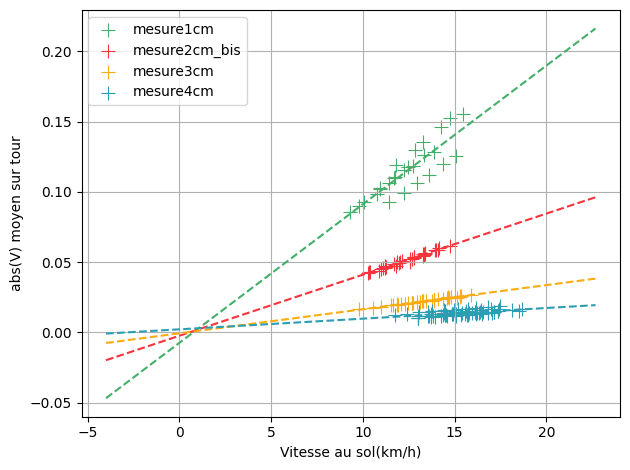

In [12]:
def process(x):
    line = x.strip().split(",")
    #time, val, index
    return (float(line[0]),float(line[1]),int(line[2]))

def get_index(fp):
    index = 0
    for i in range(len(NAMES_INDEX)):
        if NAMES_INDEX[i] in fp:
            index = i+1
            break
    return index

ampl_mesures = [[] for i in range(len(NAMES_INDEX))]
temps_mesures = [[] for i in range(len(NAMES_INDEX))]
V_mesures = [[] for i in range(len(NAMES_INDEX))]
Vmax = None

plt.figure()
for fp in data_files:
    idx = get_index(fp)
    print(fp, idx)
    if idx == 0:
        continue
    idx-=1
    with open(join(LABEL_DIR,fp)) as f:
        labels = f.readlines()
        labels = [process(x) for x in labels]
    nametag = fp.split(".")[0]
    signal = read_np(nametag+".csv", DATA_DIR)
    amps = []
    T = []  
    for i in range(len(labels)-1):
        x1,y1,ix1 = labels[i]
        x2,y2,ix2 = labels[i+1]
        calculatedAmp = 0.5*np.mean(np.abs(signal[ix1:ix2+1, 1]))
        amps.append(calculatedAmp)
        T.append(x2-x1)        
        ampl_mesures[idx].append(calculatedAmp)
        temps_mesures[idx].append(x2-x1)
        localV = PERIMETRE_ROUE/(x2-x1)*3.6
        V_mesures[idx].append(localV)
        if Vmax is None or localV > Vmax:
            Vmax = localV

toffset = 4
Vmin = -toffset
Vmax+= toffset

for i in range(len(NAMES_INDEX)):
    plt.scatter(V_mesures[i], ampl_mesures[i], label=NAMES_INDEX[i], color=COLORS_INDEX[i], marker="+", s=100, linewidths=0.8)
    reg = stats.linregress(V_mesures[i], ampl_mesures[i])

    valsT = [Vmin, Vmax]
    valsL = [reg[1]+Vmin*reg[0], reg[1] + Vmax*reg[0]]
    plt.plot(valsT,valsL, color=COLORS_INDEX[i], linestyle="--", linewidth=1.5)

# plt.title("fp: "+fp)
plt.xlabel("Vitesse au sol(km/h)")
plt.ylabel("abs(V) moyen sur tour")
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

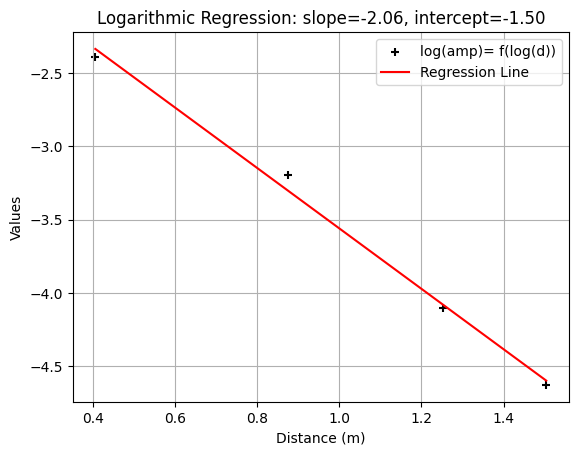

In [13]:

# Filter the curves matching the specified names
matching_indices = [i for i, name in enumerate(NAMES_INDEX) if name in ["mesure1cm", "mesure2cm_bis", "mesure3cm", "mesure4cm"]]
distance = np.array([1., 1.9, 3.0, 4.0])  # Distances corresponding to the matching indices
offset = 0.5
distance = distance+offset

# Store the affine matches and bisect results
affine_matches = []
bisect_results = []

# Given x value for bisection
x_value = 10  # Replace with your desired x value

for i in matching_indices:
    # Perform linear regression for the curve
    reg = stats.linregress(V_mesures[i], ampl_mesures[i])
    slope, intercept = reg[0], reg[1]
    affine_matches.append((slope, intercept))
    
    # Create a linear function using the regression result
    linear_func = interp1d([Vmin, Vmax], [intercept + Vmin * slope, intercept + Vmax * slope])
    
    # Bisect the curve for the given x value
    bisect_result = linear_func(x_value)
    bisect_results.append(bisect_result)

logdist = np.log(distance)
logval = np.log(bisect_results)

#regress logdist/logval
log_reg = stats.linregress(logdist, logval)

plt.figure()
plt.scatter(logdist, logval, label="log(amp)= f(log(d))", color="black", marker="+")
# plt.scatter(distance, bisect_results, label="Bisect Results", color="blue", marker="o")

plt.xlabel("Distance (m)")
plt.ylabel("Values")
plt.title(f"Logarithmic Regression: slope={log_reg[0]:.2f}, intercept={log_reg[1]:.2f}")
plt.plot(logdist, log_reg[0] * logdist + log_reg[1], color="red", label="Regression Line")
plt.legend()
plt.grid()
plt.show()

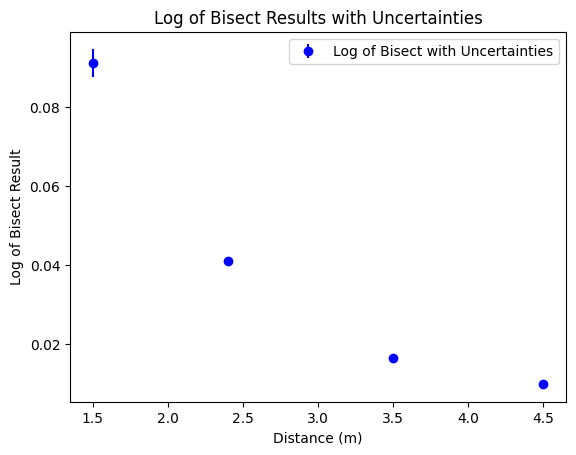

In [4]:
#estimation incertitudes par monte carlo
import random
def monte_carlo_estimation(ampl_mesures, n_samples=1000):
    estimates = []
    for _ in range(n_samples):
        sample = [random.choice(ampl_mesures) for _ in range(len(ampl_mesures))]
        estimates.append(np.mean(sample))
    return np.std(estimates)

# Calculer l'incertitude sur la decroissance en fonction de la distance
uncertainties = []
for i in matching_indices:
    uncertainty = monte_carlo_estimation(ampl_mesures[i])
    uncertainties.append(uncertainty)
# Afficher les valeurs avec incertitudes sur un graphique
plt.figure()
plt.errorbar(distance, bisect_results, yerr=uncertainties, fmt='o', color='blue', label='Log of Bisect with Uncertainties')
# Perform linear regression on the log of bisect results with uncertainties

plt.xlabel("Distance (m)")
plt.ylabel("Log of Bisect Result")
plt.title("Log of Bisect Results with Uncertainties")
plt.legend()
plt.show()

